<a href="https://colab.research.google.com/github/saifghostrider454/MachineLearningFull/blob/main/SDML(DIABETES_PREDICTION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
554,1,84,64,23,115,36.9,0.471,28,0
682,0,95,64,39,105,44.6,0.366,22,0
734,2,105,75,0,0,23.3,0.560,53,0
638,7,97,76,32,91,40.9,0.871,32,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

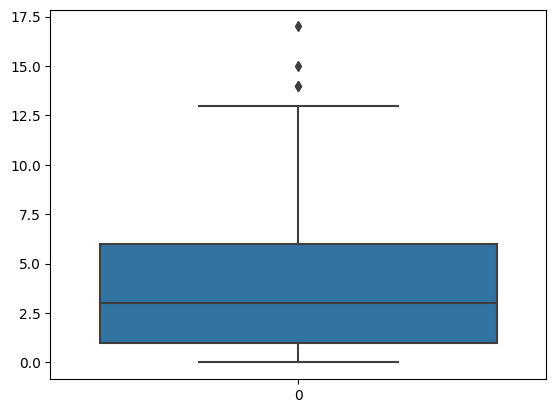

In [8]:
sns.boxplot(df.Pregnancies)

In [9]:
df.shape

(768, 9)

In [10]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
# 0 --> Non Diabetic  and 1 --> Diabetic

In [13]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [18]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Pre processing Data

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X)

StandardScaler()

In [23]:
std_df = scaler.transform(X)

In [24]:
std_df

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [25]:
X = std_df

### Train Test Split Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

### Training Data

In [33]:
model = svm.SVC(kernel='linear')

In [34]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
pred = model.predict(X_train)

In [36]:
accuracy_score(pred, y_train)

0.7866449511400652

In [37]:
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.7727272727272727

### Making a predictive system

In [48]:
input_data = (3,78,50,32,88,31,0.248,26)

arr = np.array(input_data).reshape(1, -1)

In [49]:
std_data = scaler.transform(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
std_data

array([[-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067]])

In [51]:
pred = model.predict(std_data)

In [53]:
print(pred)

[0]


In [54]:
def diabetic_prediction(array):
  # 0 --> Non Diabetic  and 1 --> Diabetic
  arr = np.array(array).reshape(1, -1)
  std_data = scaler.transform(arr)
  pred = model.predict(std_data)

  if pred == 0:
    return 'Non Diabetic'
  elif pred == 1:
    return 'Diabetic'

In [57]:
arr = (4,110,92,0,0,37.6,0.191,30)

diabetic_prediction(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Non Diabetic'